<a href="https://colab.research.google.com/github/LuisBGodoi/Portfolio/blob/main/Study_of_Portfolio_Managment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRODUCTION

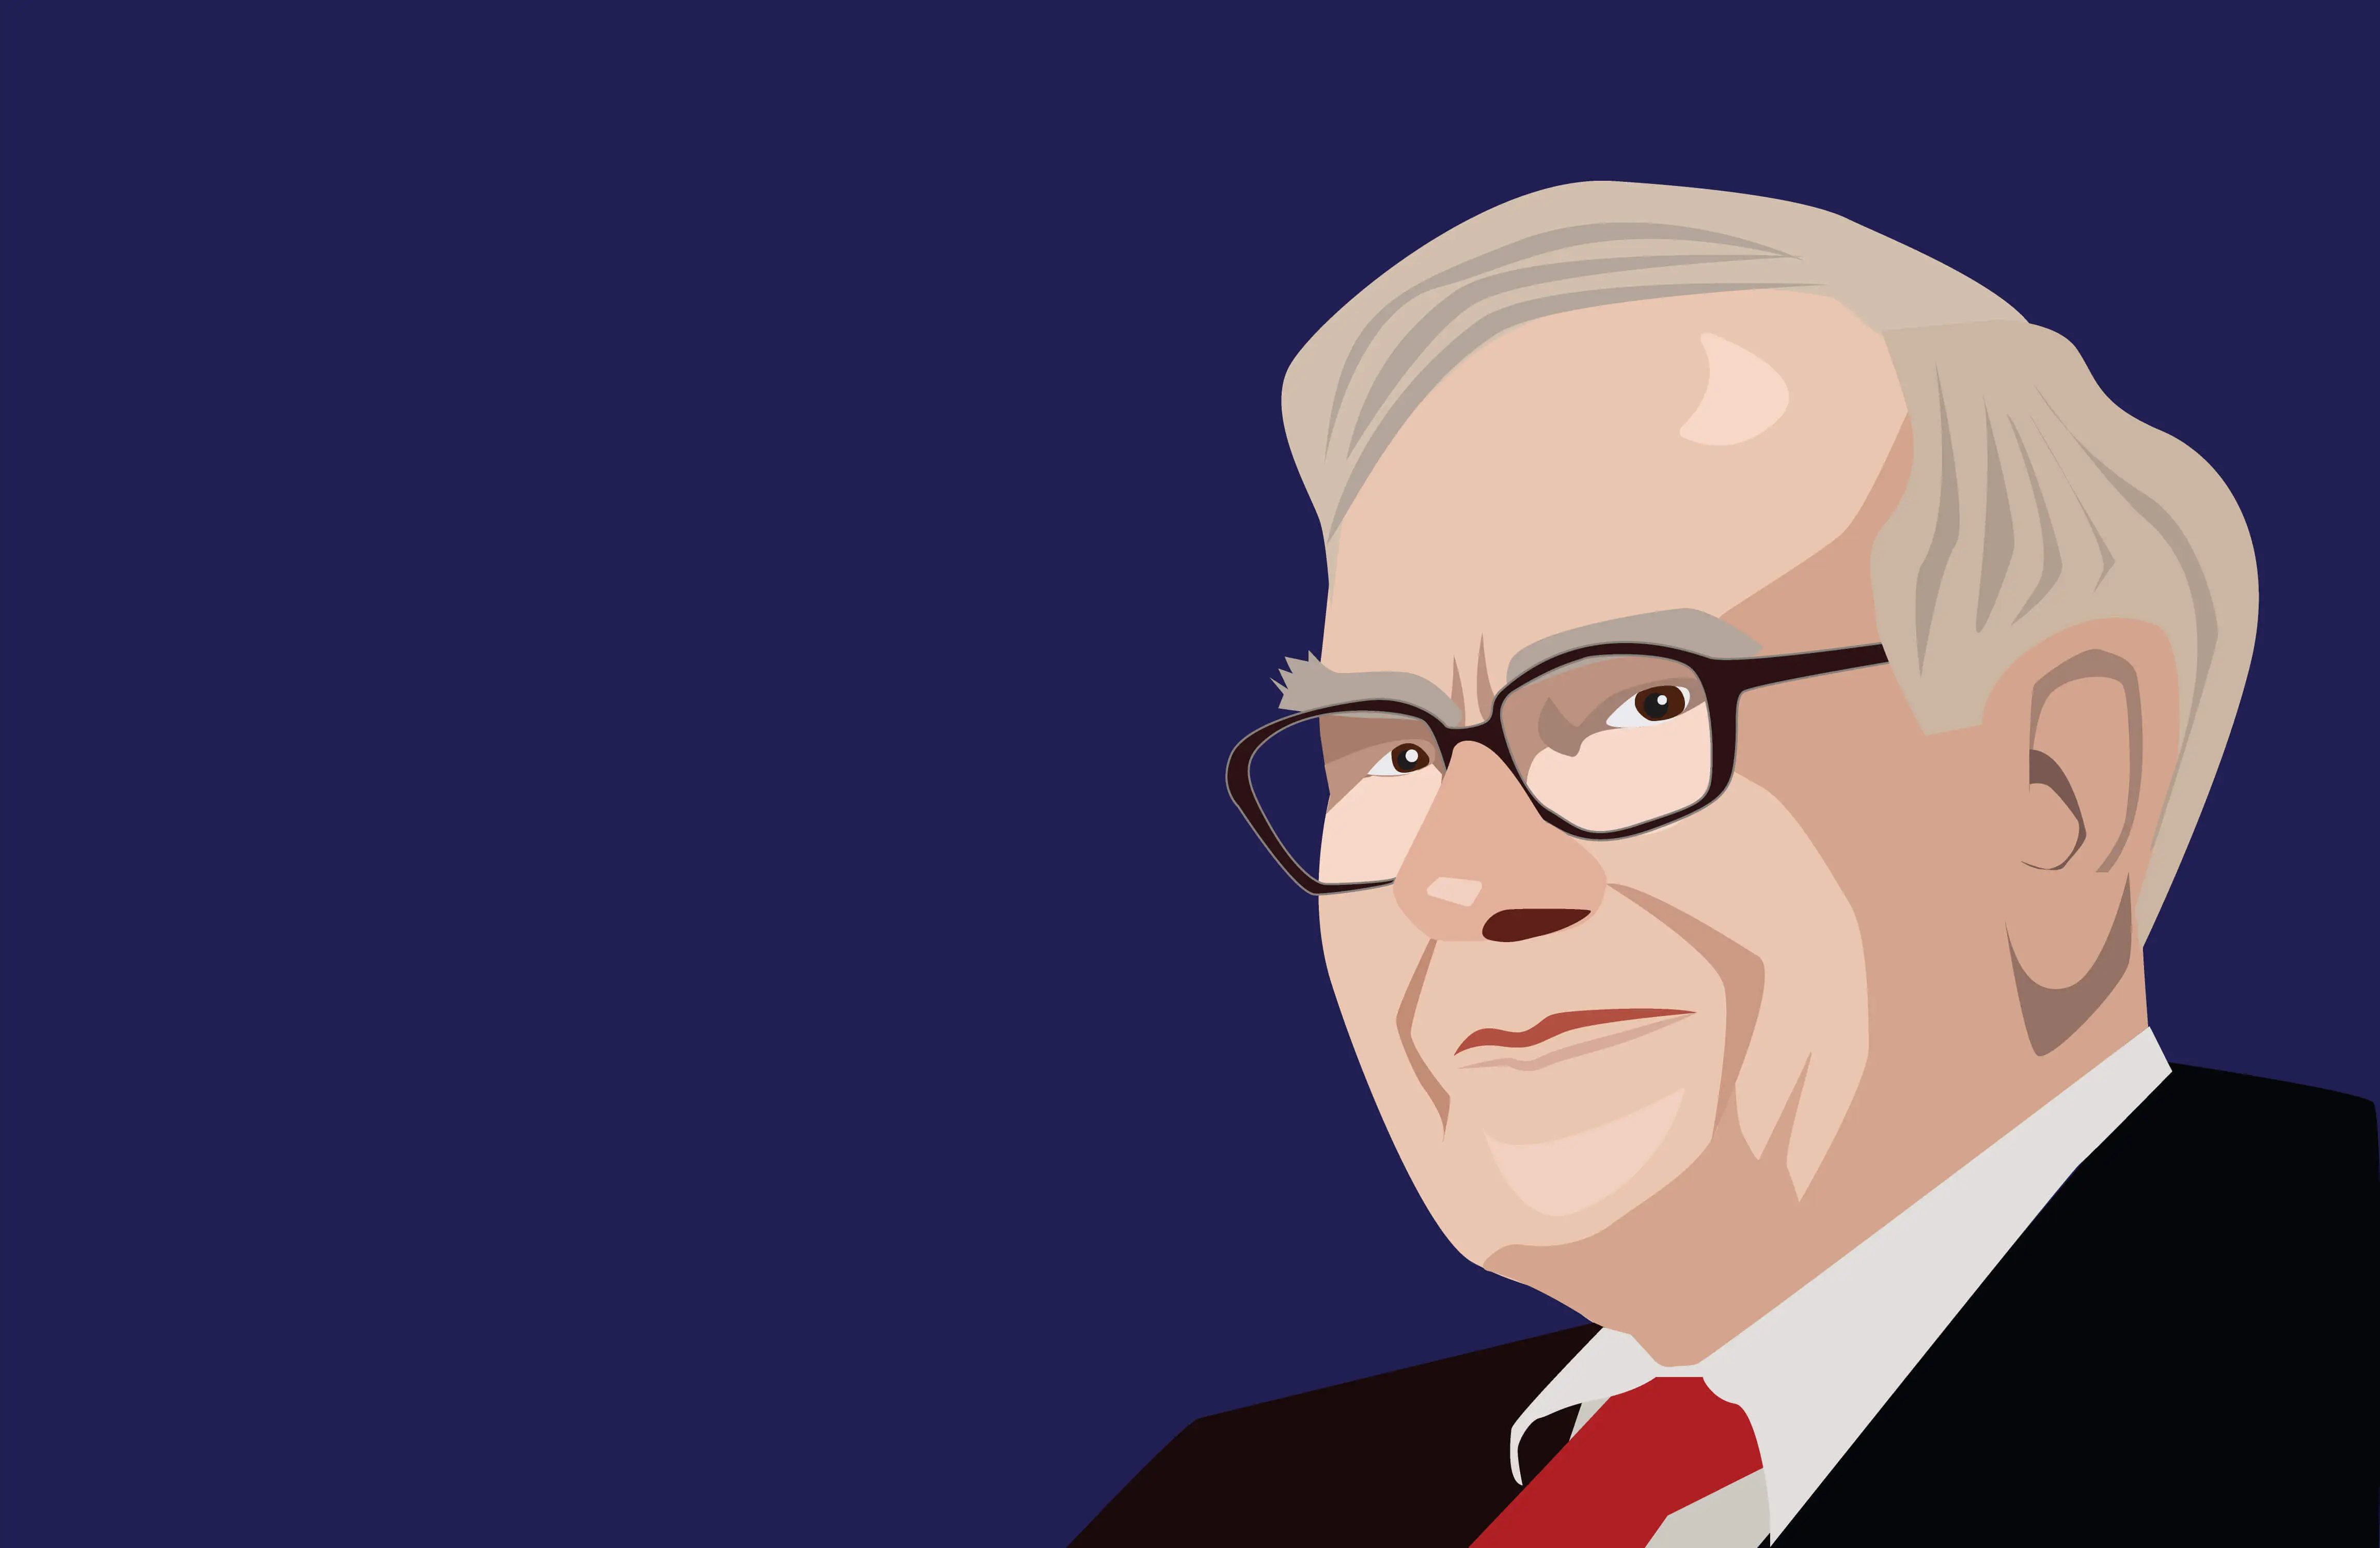Warren Buffet  is one of the best investors in the world, specially when we are talking about the fundamental investing. Buffet was a pupil of the chairmanvesting and his pioneer Benjamin Graham.
He is the chairman and majority shareholder of the Berkshire Hathaway one of America's largest holding.
He is known as Oracle of Omaha, his home town. This is a result of having accumlated a massive fortune derivednfrom his investiment 

The Goal of this project is to show a little bit of the modern portfolio theory and to show how we can use it on analysing a portfolio. We will take a look on some statistical concepts and how to use this insights on our day to day


# DEVELOPMENT

 📚 Libraries

In [2]:
#Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import scipy

For this study i will use the top 10 stocks of the Berkshire Hathaway Holding that has about 90% of the portfolio value invested on. 
Note: this data is from 1 of april from 2023 and can have changed in the data that you are reading this.

In [3]:
#Create a function to get the data from yahoo finance
def history_data(ticker, period):
  STOCK = yf.Ticker(ticker)
  history = STOCK.history(period=period).sort_values(by='Date')
  return history

In [4]:
#Import the data of the stocks that we will analyse
period = '5y'
history_APPL = history_data('AAPL',period)
history_BAC  = history_data('BAC',period)
history_CVX  = history_data('CVX',period)
history_KO   = history_data('KO',period)
history_AXP  = history_data('AXP',period)
history_KHC  = history_data('KHC',period)
history_OXY  = history_data('OXY',period)
history_MCO  = history_data('MCO',period)
history_ATVI = history_data('ATVI',period)
history_HPQ  = history_data('HPQ',period)

In [5]:
#Take a quick look at the data
display(history_APPL)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-04-23 00:00:00-04:00,39.760635,39.782084,39.107609,39.381691,146062000,0.0,0.0
2018-04-24 00:00:00-04:00,39.484183,39.641481,38.423613,38.833542,134768000,0.0,0.0
2018-04-25 00:00:00-04:00,38.757274,39.424600,38.707227,39.002754,113528400,0.0,0.0
2018-04-26 00:00:00-04:00,39.114761,39.498473,38.936013,39.138596,111852000,0.0,0.0
2018-04-27 00:00:00-04:00,39.086169,39.164818,38.282997,38.685776,142623200,0.0,0.0
...,...,...,...,...,...,...,...
2023-04-17 00:00:00-04:00,165.089996,165.389999,164.029999,165.229996,41516200,0.0,0.0
2023-04-18 00:00:00-04:00,166.100006,167.410004,165.649994,166.470001,49923000,0.0,0.0
2023-04-19 00:00:00-04:00,165.800003,168.160004,165.539993,167.630005,47720200,0.0,0.0


In [6]:
#Calculate the returns
history_APPL['Returns_APPL'] = history_APPL['Close'].pct_change()
history_BAC['Returns_BAC'] = history_BAC['Close'].pct_change()
history_CVX['Returns_CVX'] = history_CVX['Close'].pct_change()
history_KO['Returns_KO'] = history_KO['Close'].pct_change()
history_AXP['Returns_AXP'] = history_AXP['Close'].pct_change()
history_KHC['Returns_KHC'] = history_KHC['Close'].pct_change()
history_OXY['Returns_OXY'] = history_OXY['Close'].pct_change()
history_MCO['Returns_MCO'] = history_MCO['Close'].pct_change()
history_ATVI['Returns_ATVI'] = history_ATVI['Close'].pct_change()
history_HPQ['Returns_HPQ'] = history_HPQ['Close'].pct_change()

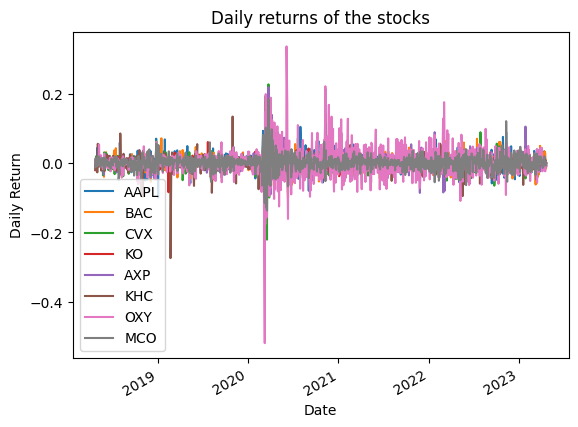

In [7]:
#plot the daily return of each stock
history_APPL['Returns_APPL'].plot()
history_BAC['Returns_BAC'].plot()
history_CVX['Returns_CVX'].plot()
history_KO['Returns_KO'].plot()
history_AXP['Returns_AXP'].plot()
history_KHC['Returns_KHC'].plot()
history_OXY['Returns_OXY'].plot()
history_MCO['Returns_MCO'].plot()
history_ATVI['Returns_ATVI'].plot
plt.legend(['AAPL','BAC','CVX','KO','AXP','KHC','OXY','MCO','ATVI'])
plt.title('Daily returns of the stocks')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

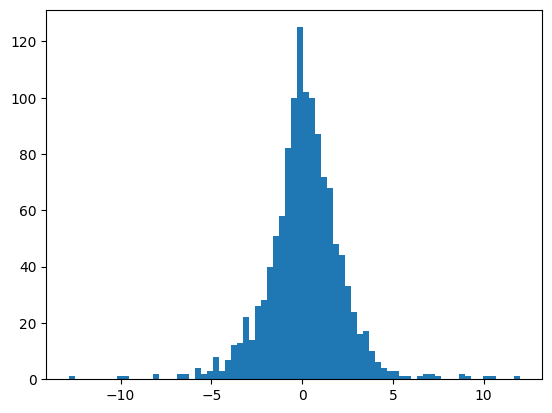

In [8]:
#View the Distribution of returns of one example
APPL_percent = history_APPL['Returns_APPL']*100
APPL_percent = APPL_percent.dropna()
plt.hist(APPL_percent, bins=75)
plt.show

## Weighted portfolio


To calculate the returns of the portfolio we import the weights from a source online. Becausa we are doing this with only 10 stocks and not the whole portfolio it wouldn't sum 100% so distribuited the rest by weighted average

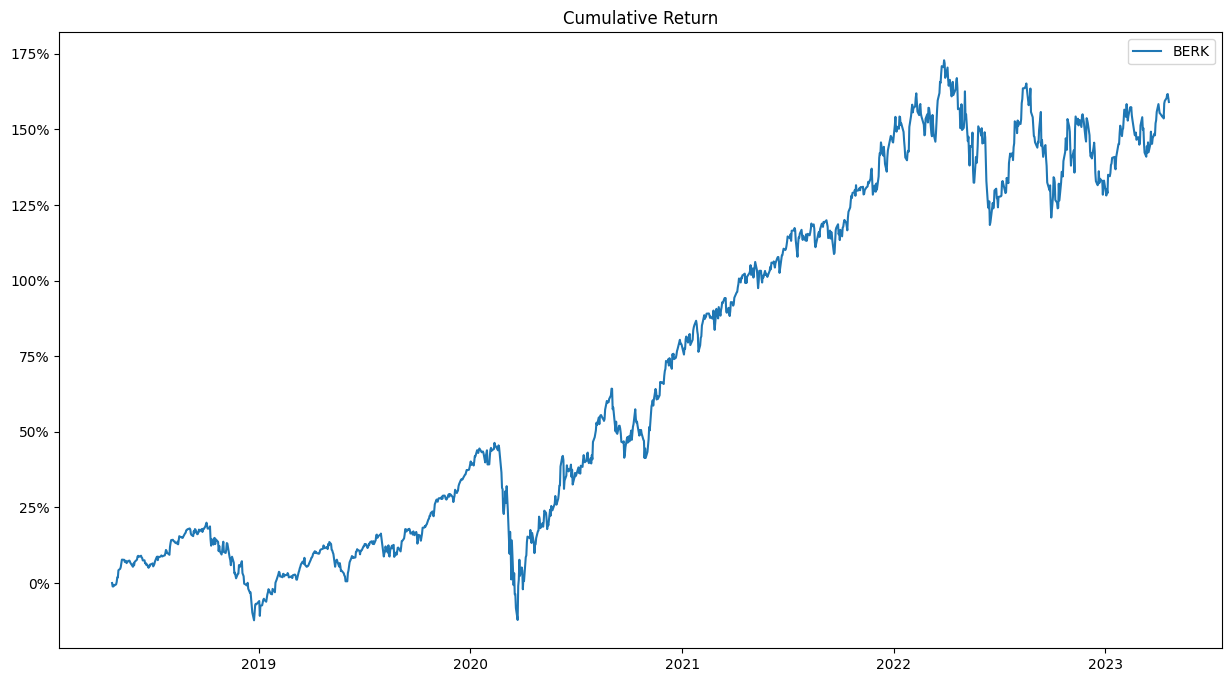

In [9]:
#Create a DataFrame with all the return
StocksReturns = pd.DataFrame()
StocksReturns = history_APPL['Returns_APPL']
StocksReturns = StocksReturns.to_frame()
StocksReturns = StocksReturns.join([history_BAC['Returns_BAC'],history_CVX['Returns_CVX'],history_KO['Returns_KO'],history_AXP['Returns_AXP'],history_KHC['Returns_KHC'],history_OXY['Returns_OXY'],history_MCO['Returns_MCO'],history_ATVI['Returns_ATVI'],history_HPQ['Returns_HPQ']])

#Create a numpy array with the weights
portfolio_weights = np.array([0.389,0.1119,0.0978,0.0851,0.0749,0.0443,0.0423,0.0230,0.0135,0.0094])
#This is the real weight for the date of 04/01/2023 but because we have selected only the top 10 the sum is not 100% to solve that we will distribuit the rest by the weight each on have in the portfolio
sum = portfolio_weights.sum()
portfolio_weights_adj = portfolio_weights/sum

#Calculate the weighted returns
WeightedReturns = StocksReturns.mul(portfolio_weights_adj,axis=1)
#Calculate the portfolio returns
StocksReturns['Portfolio'] = WeightedReturns.sum(axis=1)
CumulativeReturns = ((1+StocksReturns['Portfolio']).cumprod()-1)

#Calculate the Cumulative Returns
fig, ax = plt.subplots(figsize=(15,8))
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.plot(CumulativeReturns*100, label='BERK')
ax.set_title("Cumulative Return")
plt.legend()
plt.show()

We can see that the Berkshire had a tremendous Return on this period but we are not Warren Buffet. Let try to get a similar result but with others Weights

## Equal Weighted Portfolio

The idea of this Portfolio is quite simple just give the same weights to every stocks and lets take a look on the results

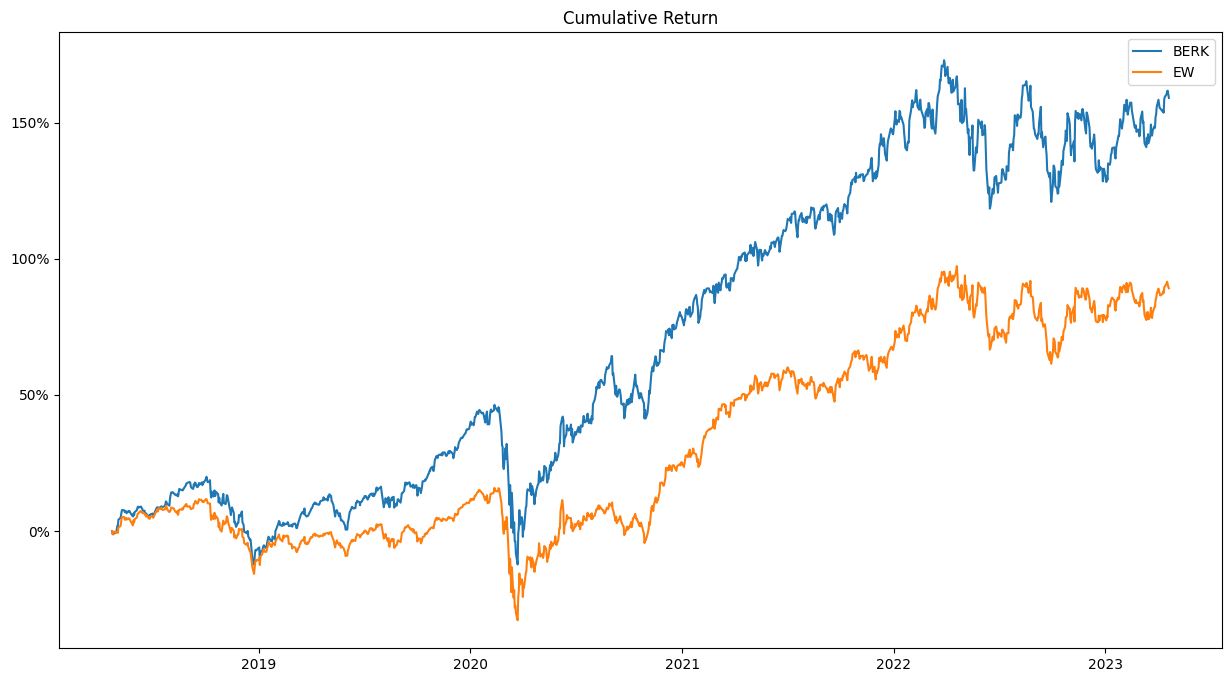

In [10]:
# Number of stocks
numstocks = 10

# Array of equal weights
portfolio_weights_equal = np.repeat(1/numstocks,numstocks)

# Calculate the equally-weighted portfolio returns
StocksReturns['Portfolio_EW'] = StocksReturns.iloc[:, :numstocks].mul(portfolio_weights_equal, axis=1).sum(axis=1)
CumulativeReturns_EW = ((1+StocksReturns['Portfolio_EW']).cumprod()-1)

#Plot the Portfolios Returns
fig, ax = plt.subplots(figsize=(15,8))
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.plot(CumulativeReturns*100, label='BERK')
ax.plot(CumulativeReturns_EW*100, label = 'EW')
ax.set_title("Cumulative Return")
plt.legend()
plt.show()

By analysing the grafics we can see that our portfolio was worst in almost every time and in the end it had only half of the returns that BERK had.
Lets try another one and see if we can do better

## Market-cap weighted portfolio

Know we will do a portfolio Weighted on the Market-Cap of the companies so we are assuming that companies with high market-cap will perfom better than thoose with lower market-cap. Lets calculate and how it will perform

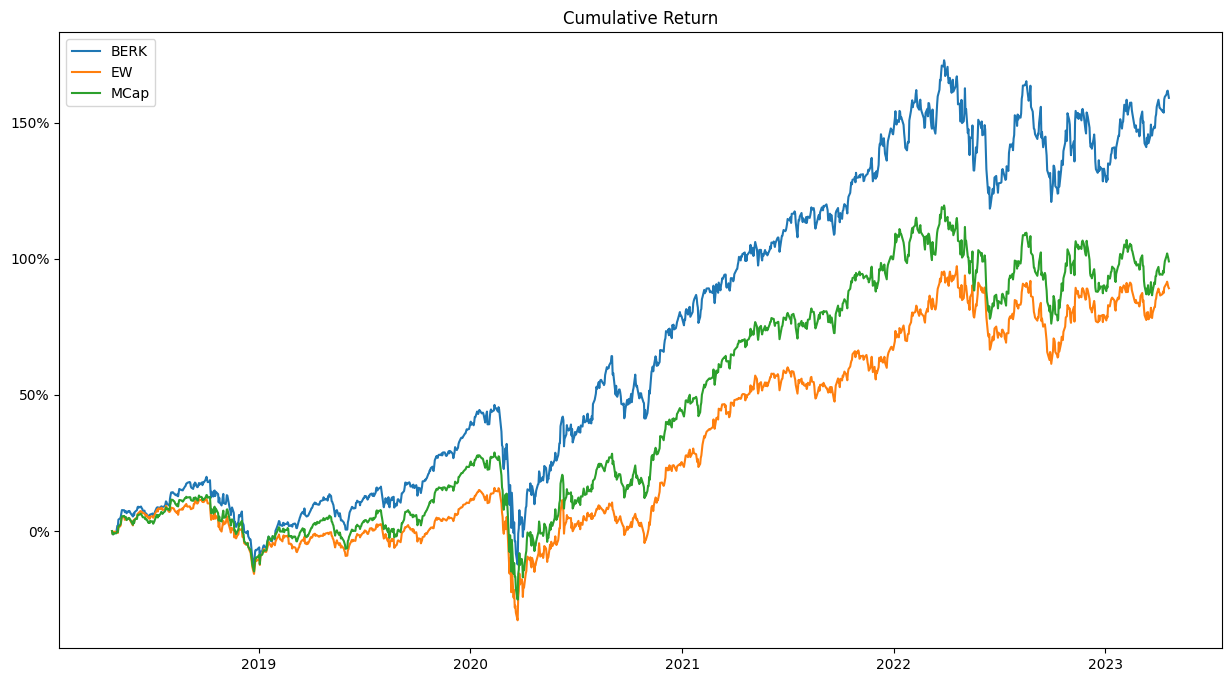

In [11]:
#Array of market capitalizations (millions USD)
market_capitalizations = np.array([895.14,1010,162.98,400,151.61,325.63,211.71,24.67,52.72,104.48])
r = 0
for s in market_capitalizations: r = s+r

# Calculate the market cap weights
mcap_weights = market_capitalizations/r

# Calculate the market cap weighted portfolio returns
StocksReturns['Portfolio_MCap'] = StocksReturns.iloc[:, 0:numstocks].mul(mcap_weights, axis=1).sum(axis=1)
CumulativeReturns_MCap = ((1+StocksReturns['Portfolio_MCap']).cumprod()-1)

#Plot the Portfolios Returns
fig, ax = plt.subplots(figsize=(15,8))
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.plot(CumulativeReturns*100, label='BERK')
ax.plot(CumulativeReturns_EW*100, label = 'EW')
ax.plot(CumulativeReturns_MCap*100, label = 'MCap')
ax.set_title("Cumulative Return")
plt.legend()
plt.show()

By using the MCap weighted portfolio we got a increase of our return in comparison with the Equal Weight but we are a long way to Berk portfolio.
Lets introduce you to some statistical so we can get a better portfolio

## Correlation

First we will show the correlation between the stocks on our portfolio.
Correlation is a statistical concept that show us how two elements vary depending on each other. So if we have a Correlation 1 it means that when one stock go up by 3% the other will go up by 3% and vice versa. The correlation -1 is the opposite so when one stock go up 3% the other go down 3%. 

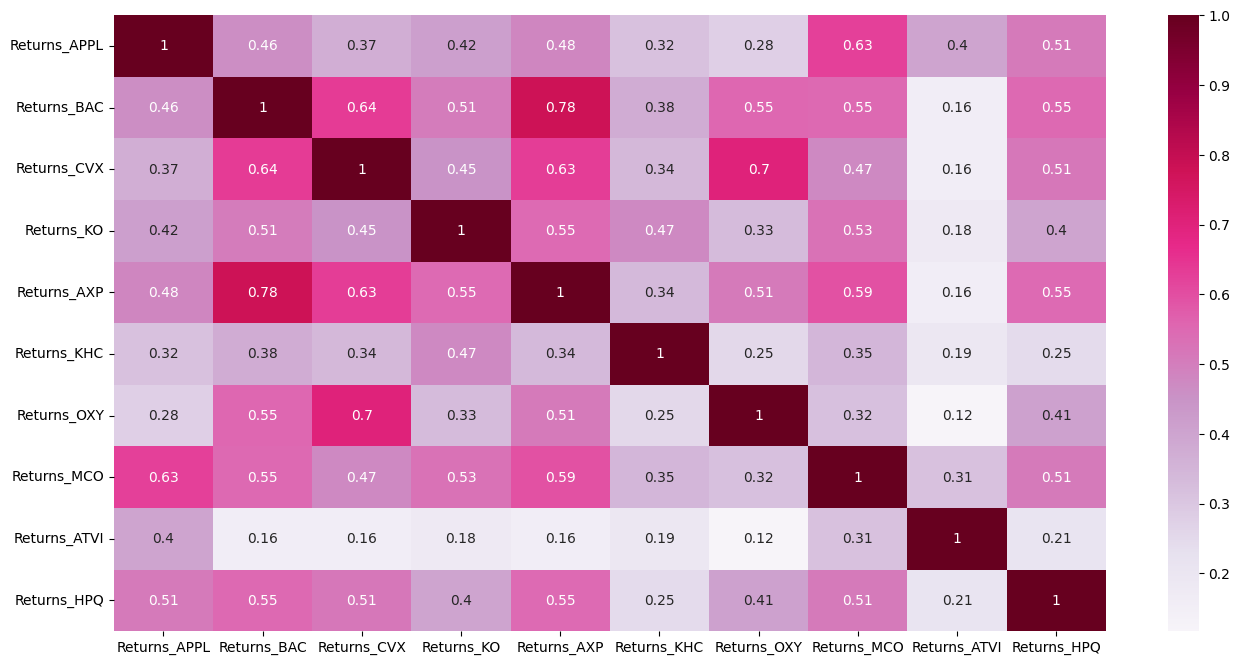

In [12]:
correlation = StocksReturns.iloc[:,0:numstocks].corr()
plt.figure(figsize = (16,8))
sns.heatmap(correlation,annot=True,cmap='PuRd')
plt.show()

Note that on this portfolio we have stocks like ATVI in which have a very low correlation with the others but we have Bank of America and American Express that have a high correlation. 
By analysing the heatmap we can see also that has a predominance lighter colors, but with points os stronger colors that means that in despite that the general low correlation there are a few companies that have a higher correlation like AXP and BAC, or OXY and CVX.
This ocorrs due to the bussiness of the companies. Let me give a quick introduction to the companies of the portfolio
*   AAPL : Apple a tech company focused on hardware and mobile.m da lista
*   BAC  : Bank of America is one of the biggest banks in america
*   CVX  : Chevron Corp is a energy-focused company predominantly in oil and gas
*   KO   : Coca Cola Co is a drink industry company
*   AXP  : American Express a multinational fiancial services corp.
*   OXY  : Occidental Petroleum is a company engaged in hydrocarbon exploration as weall as petrochemical manufacturing
*   MCO  : Moodys Corp is a company that provides investors with credit rating, risk 
analysis and research for stocks, bonds and government entities.
*   ATVI : Activision is a American video game holding.
*   HPQ  : HP is a multinational information technology company.

The high correlation of AXP and BAC is due to both being financial sector companies so when one of then goes up the other one tends to follow the same behavior. Also the correlation of OXY and CVX is due to both being companies focused on oil and energy services.




















## Covariance

We have to calculate also the covariance.

Covariance signifies the direction of the linear relationship between the two variables. The higher this value, the more dependent the relationship betwen the two elements is.

In [13]:
cov = StocksReturns.iloc[:,0:numstocks].cov()
cov_annual = cov*252
print(cov_annual)

              Returns_APPL  Returns_BAC  Returns_CVX  Returns_KO  Returns_AXP  \
Returns_APPL      0.111106     0.054888     0.043773    0.029824     0.060557   
Returns_BAC       0.054888     0.126654     0.080599    0.038585     0.104849   
Returns_CVX       0.043773     0.080599     0.126496    0.034365     0.084596   
Returns_KO        0.029824     0.038585     0.034365    0.046034     0.044216   
Returns_AXP       0.060557     0.104849     0.084596    0.044216     0.141884   
Returns_KHC       0.033770     0.043179     0.038935    0.032580     0.040823   
Returns_OXY       0.058783     0.124534     0.158217    0.045161     0.121527   
Returns_MCO       0.067705     0.063296     0.054620    0.036856     0.072572   
Returns_ATVI      0.045970     0.018978     0.019099    0.013303     0.020171   
Returns_HPQ       0.065079     0.075459     0.070314    0.033159     0.078995   

              Returns_KHC  Returns_OXY  Returns_MCO  Returns_ATVI  Returns_HPQ  
Returns_APPL     0.033770  

## Volatility

Volatility is a statistical measure of the dispersion of returns for a given security or market index. The higher the volatility, the riskier the security.

To calculate the portfolio volatility i use this formula:

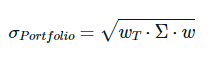

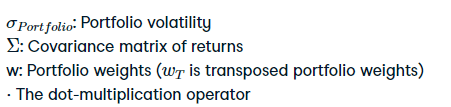

In [14]:
volatility = np.sqrt(np.dot(portfolio_weights.T,np.dot(cov_annual,portfolio_weights)))
print(volatility)

0.2330897561549195


## Sharpe Ratio

The sharpe ration is a very comum but simple metric of risk. It is used to measure how much risk is being taken to achieve a certain level of return. Higher the Sharpe Ratio, better the return.
We will use this formula to calculate:


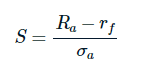

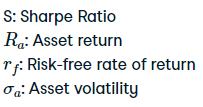

For calculate the Sharp Ratio we will generate random weights portfolios so we can analise which one is have the best risk-return.

In [15]:
#Generate the random weights and calculate the returns and volatility for each one
weights = []
returns = []
volatilitys = []
for i in range(0,100000):
    a = np.random.random(numstocks)
    a /= a.sum()
    weights.append(a)
    rt = (StocksReturns.iloc[:,0:numstocks].mul(a,axis=1).sum(axis=1))
    z = ((1+rt).cumprod()-1)
    returns.append(z.iloc[-1])
    s = np.sqrt(np.dot(a.T,np.dot(cov_annual,a)))
    volatilitys.append(s)
random_portfolio = pd.DataFrame(weights,columns=['APPL_weight','BAC_weight','CVX_weight','KO_weight','AXP_weight','KHC_weight','OXY_weight','MCO_weight','ATVI_weight','HPQ_weight'])
random_portfolio['Returns'] = returns
random_portfolio['Volatility'] = volatilitys

In [17]:
CumulativeReturns

Date
2018-04-23 00:00:00-04:00    0.000000
2018-04-24 00:00:00-04:00   -0.012061
2018-04-25 00:00:00-04:00   -0.009825
2018-04-26 00:00:00-04:00    0.001184
2018-04-27 00:00:00-04:00   -0.002004
                               ...   
2023-04-17 00:00:00-04:00    0.757322
2023-04-18 00:00:00-04:00    0.762212
2023-04-19 00:00:00-04:00    0.754179
2023-04-20 00:00:00-04:00    0.749047
2023-04-21 00:00:00-04:00    0.745858
Length: 1259, dtype: float64

In [20]:
# Calculate the volatility for Buffet's portfolio
vol_BERK = np.sqrt(np.dot(portfolio_weights.T,np.dot(cov_annual,portfolio_weights)))
ret_BERK = CumulativeReturns.iloc[-1]

In [22]:
#Set the risk free rate as 5% (US Tax free risk)
risk_free = 0.05

# Calculate the Sharpe Ratio for each asset
random_portfolio['Sharpe'] = (random_portfolio['Returns']-risk_free)/random_portfolio['Volatility']

# Print the range of Sharpe ratios
print(random_portfolio['Sharpe'].describe()[['min', 'max']])


min    0.987158
max    6.108168
Name: Sharpe, dtype: float64


In [31]:
# Calculate the Sharpe Ratio for Buffet's portfolio
sharpe_BERK = (ret_BERK-risk_free)/vol_BERK

In [24]:
max = random_portfolio['Sharpe'].describe()['max']
max_Sharpe = random_portfolio[random_portfolio['Sharpe'] == max]

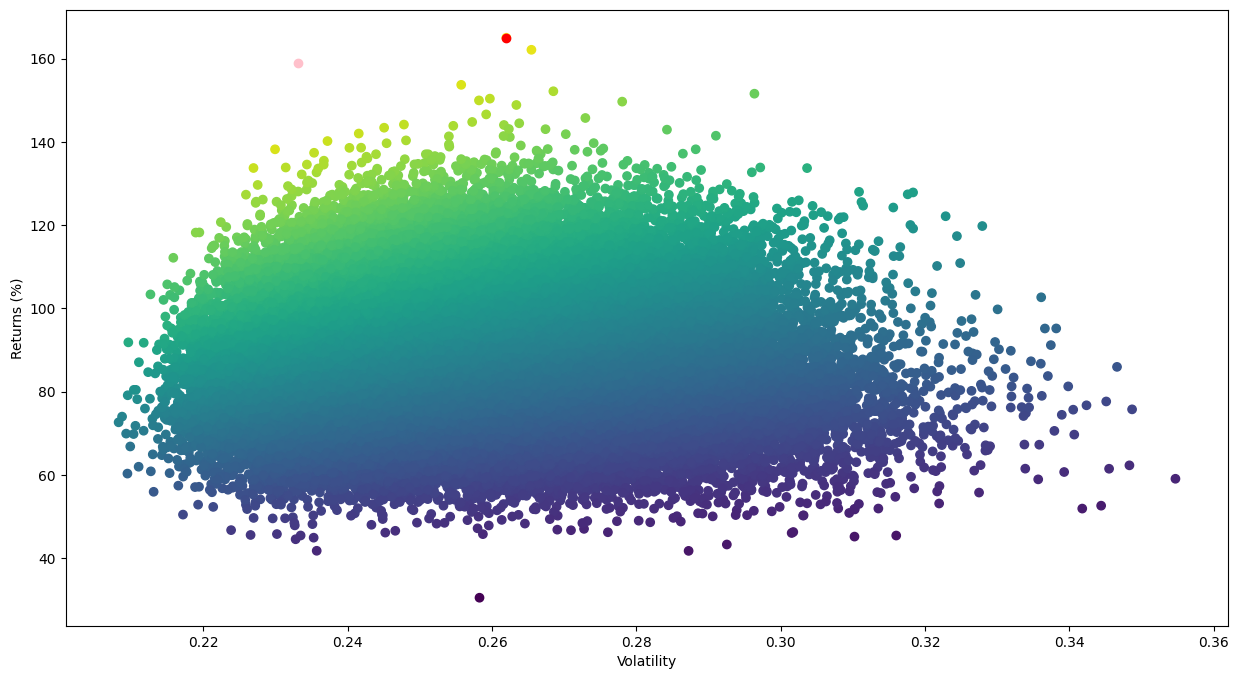

In [37]:
#Plot the Returns x Volatility with color on the point with maximum Sharpe Rate
fig, ax = plt.subplots(figsize=(15,8))
ax.scatter(random_portfolio['Volatility'],random_portfolio['Returns']*100, c = random_portfolio['Sharpe'])
ax.scatter(max_Sharpe['Volatility'],max_Sharpe['Returns']*100,c = 'r')
ax.scatter(vol_BERK,ret_BERK*100,c = 'pink')
ax.set_xlabel("Volatility")
ax.set_ylabel("Returns (%)")
plt.show()

In this grafic we can see the that the maximum sharpe point of this sample have a higher volatility so a higher risk but a higher return so the sharpe is a little bit highers than the Berkshire one. Also we can see that even with 100.000 test we couldn't had a portfolio with less risk and higher return than the Berkshire and thats where enter the Markowitz theory about the efficient frontier.
Markowitz said that there is a frontier that maximize the portfolio return for a given level of risk and we should try to put our portfolio there by setting our personal level of risk and this frontier wil be like that:
all credits of the image to https://www.guidedchoice.com/video/dr-harry-markowitz-father-of-modern-portfolio-theory/
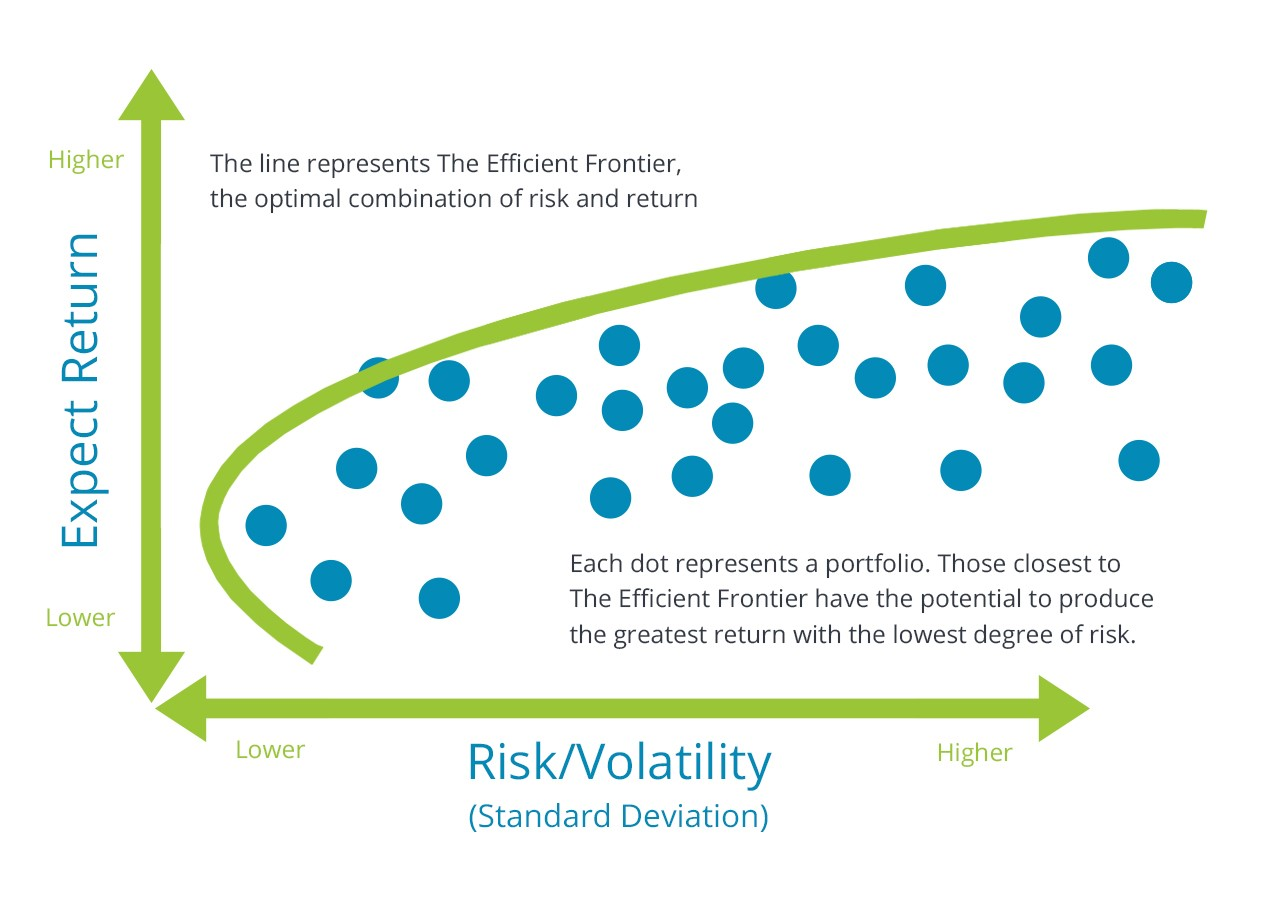

## Maximum Sharpe Ratio

Now where are plotting the maximum sharpe ratio weights on the portfolio and 
calculate the cumulative returns

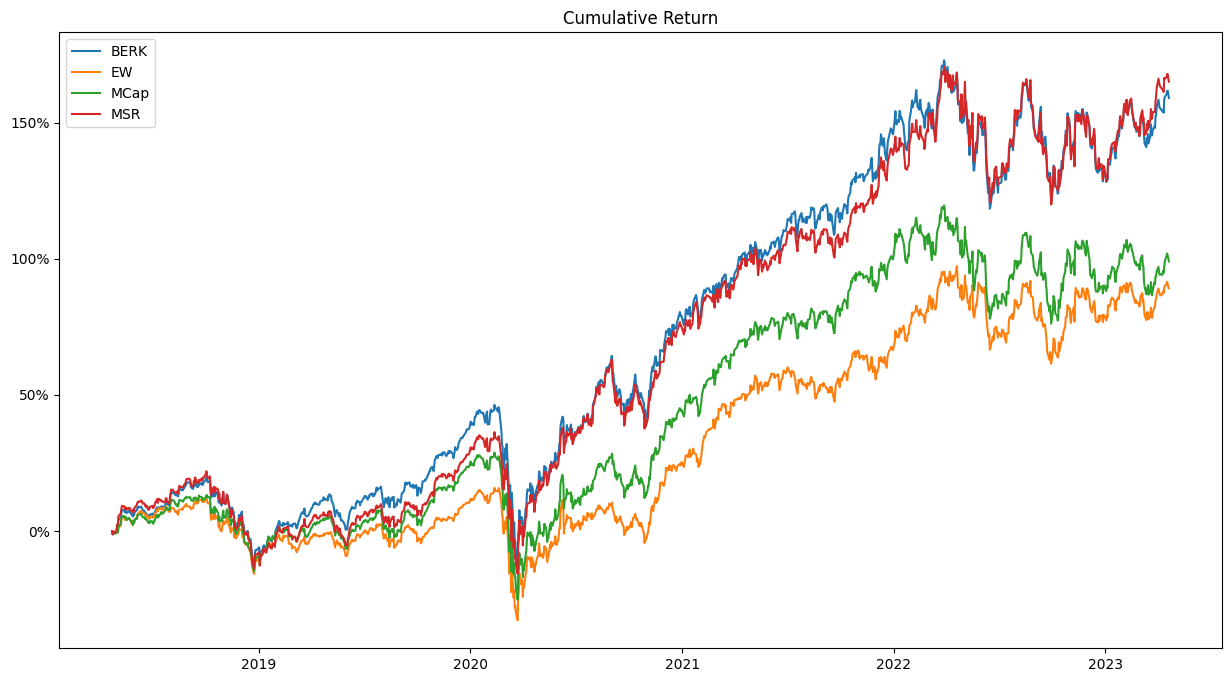

In [38]:
# Sort the portfolios by Sharpe ratio
sorted_portfolios = random_portfolio.sort_values(by=['Sharpe'], ascending=False)

# Extract the corresponding weights
MSR_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the MSR weights as a numpy array
MSR_weights_array = np.array(MSR_weights)

# Calculate the MSR portfolio returns
StocksReturns['Portfolio_MSR'] = StocksReturns.iloc[:, 0:numstocks].mul(MSR_weights_array, axis=1).sum(axis=1)
CumulativeReturns_MSR = ((1+StocksReturns['Portfolio_MSR']).cumprod()-1)


# Plot the cumulative returns
fig, ax = plt.subplots(figsize=(15,8))
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.plot(CumulativeReturns*100, label='BERK')
ax.plot(CumulativeReturns_EW*100, label = 'EW')
ax.plot(CumulativeReturns_MCap*100, label = 'MCap')
ax.plot(CumulativeReturns_MSR*100, label = 'MSR')
ax.set_title("Cumulative Return")
plt.legend()
plt.show()

Note that finally we got a portfolio that had a return higher than BERKs one

## Global Minimum Volatility portfolio

The Global Minimum Volatility portfolio is the portfolio with lowest standard deviation and the highest return for the given risk.
So this is the most conservative choice

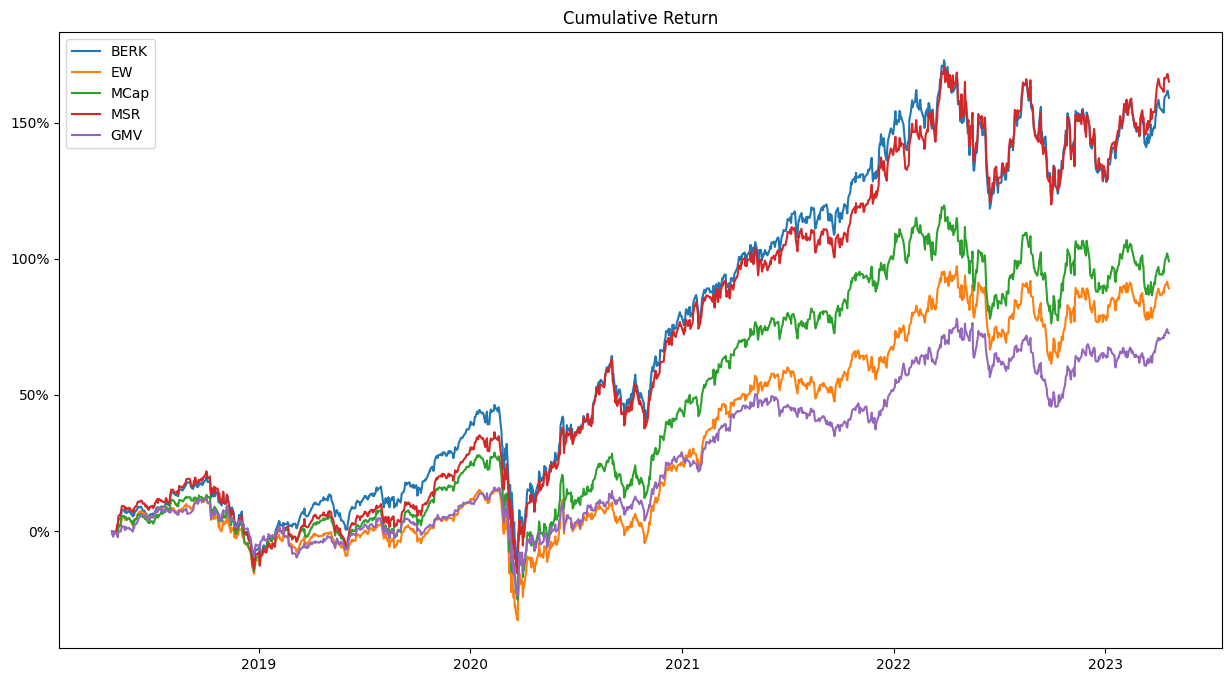

In [40]:
# Sort the portfolios by volatility
sorted_portfolios = random_portfolio.sort_values(by=['Volatility'], ascending=True)

# Extract the corresponding weights
GMV_weights = sorted_portfolios.iloc[0, 0:numstocks]

# Cast the GMV weights as a numpy array
GMV_weights_array = np.array(GMV_weights)

# Calculate the GMV portfolio returns
StocksReturns['Portfolio_GMV'] = StocksReturns.iloc[:, 0:numstocks].mul(GMV_weights_array, axis=1).sum(axis=1)
CumulativeReturns_GMV = ((1+StocksReturns['Portfolio_GMV']).cumprod()-1)

# Plot the cumulative returns
fig, ax = plt.subplots(figsize=(15,8))
fmt = '%.0f%%'
yticks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yticks)
ax.plot(CumulativeReturns*100, label='BERK')
ax.plot(CumulativeReturns_EW*100, label = 'EW')
ax.plot(CumulativeReturns_MCap*100, label = 'MCap')
ax.plot(CumulativeReturns_MSR*100, label = 'MSR')
ax.plot(CumulativeReturns_GMV*100, label = 'GMV')
ax.set_title('Cumulative Return')
ax.legend()
plt.show()

We can see that in this portfolio it has the lower returns of all and that is because it has the lower risk.